In [1]:
import pandas as pd

df = pd.read_csv("dataset_tomat.csv")
df

,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98
...,...,...,...,...,...
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138


In [3]:
df.shape

(95, 5)

In [6]:
df.columns

Index(['Harga', 'Hari', 'Cuaca', 'Promo', 'Total_Penjualan'], dtype='object')

In [7]:
df.sample(5)

,Harga,Hari,Cuaca,Promo,Total_Penjualan
29,11200,Sabtu,Cerah,Tidak,138
3,9500,Selasa,Mendung,Tidak,70
42,7900,Selasa,Hujan,Tidak,72
50,7400,Senin,Cerah,Tidak,96
81,7200,Jumat,Cerah,Tidak,95


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Harga            95 non-null     int64 
 1   Hari             95 non-null     object
 2   Cuaca            95 non-null     object
 3   Promo            95 non-null     object
 4   Total_Penjualan  95 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.8+ KB


In [9]:
df.describe()

,Harga,Total_Penjualan
count,95.000000,95.000000
mean,9217.894737,110.810526
std,1771.042423,29.813711
min,6200.000000,60.000000
25%,7800.000000,88.000000
50%,9000.000000,102.000000
75%,10650.000000,135.000000
max,13000.000000,178.000000


In [10]:
df.isna().sum()

Harga              0
Hari               0
Cuaca              0
Promo              0
Total_Penjualan    0
dtype: int64

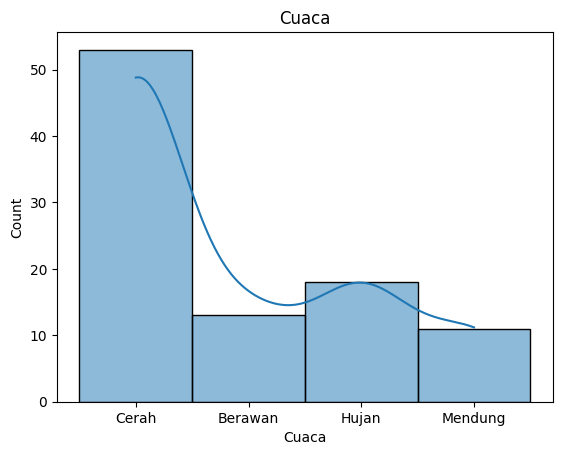

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["Cuaca"], kde=True)
plt.title("Cuaca")
plt.show()

In [12]:
skew_val = df["Harga"].skew()
print(skew_val)

0.28943257774436654


In [13]:
df.head()

,Harga,Hari,Cuaca,Promo,Total_Penjualan
0,8000,Senin,Cerah,Tidak,92
1,7500,Senin,Berawan,Tidak,88
2,12000,Selasa,Hujan,Ya,105
3,9500,Selasa,Mendung,Tidak,70
4,7000,Rabu,Cerah,Tidak,98


In [14]:
df.tail()

,Harga,Hari,Cuaca,Promo,Total_Penjualan
90,7000,Jumat,Mendung,Tidak,80
91,6500,Sabtu,Cerah,Ya,178
92,11200,Sabtu,Cerah,Tidak,130
93,11500,Minggu,Cerah,Tidak,138
94,8200,Minggu,Hujan,Tidak,88


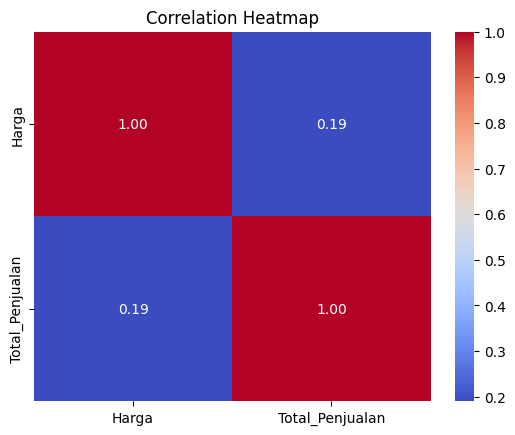

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

num_features = df[["Harga", "Total_Penjualan"]]
corr = num_features.corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

X=df[['Harga', 'Hari', 'Cuaca', 'Promo']]
y=df["Total_Penjualan"]

X_train, X_test, y_train, y_test = train_test_split (
    X, y, test_size=0.2, random_state=42)

numeric_column = ["Harga"]
categori_column = ["Hari", "Cuaca", "Promo"]

preprocessing = ColumnTransformer (
    transformers = [
        ("scaler", StandardScaler(), numeric_column),
        ("ohe", OneHotEncoder(), categori_column)
    ]
)

model = Pipeline (
    steps = [
        ("preprocessing", preprocessing),
        ("model", LinearRegression())
    ]
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("R2 Score : ", r2_score(y_test, y_pred))
print("MAE : ", mean_absolute_error(y_test, y_pred))
print("MSE : ", mean_squared_error(y_test, y_pred))

R2 Score :  0.9064850021518649
MAE :  8.17094197677559
MSE :  108.13545900754994


In [29]:
data_baru = pd.DataFrame([[6000, "Senin", "Mendung", "Ya"]], columns=["Harga", "Hari", "Cuaca", "Promo"])
prediksi = model.predict(data_baru)[0]
print(f"Model memprediksi total penjualan tomat {prediksi}")

Model memprediksi total penjualan tomat 103.80557513935646
